In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab.ipynb")

# Lab 2 – `pandas` 

## DSC 80, Spring 2022

### Due Date: Monday, April 11th at 11:59 PM

## Instructions
Much like in DSC 10, this Jupyter Notebook contains the statements of the problems and provides code and Markdown cells to display your answers to the problems. Unlike DSC 10, the notebook is *only* for displaying a readable version of your final answers. The coding will be done in an accompanying `lab.py` file that is imported into the current notebook.

Labs and programming assignments will be graded in (at most) two ways:
1. The functions and classes in the accompanying `.py` file will be tested (a la DSC 20),
2. The notebook may be graded (if it contains free response questions or asks you to draw plots).

**Note**: Labs will have public tests and private tests. The public "smoke tests" that you will run below and which appear on Gradescope are generally worth no points. After the due date, we will replace these tests with private tests that will determine your grade. This is different from DSC 10, where labs only had public tests!

**Do not change the function names in the `*.py` file!**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name.
- If you changed something you weren't supposed to, just use git to revert! Ask us if you need help with this, or google around for `git revert`.

**Tips for working in the notebook**:
- The notebooks serve to present the questions and give you a place to present your results for later review.
- The notebooks in *lab assignments* are not graded (only the `.py` file is submitted and graded).
- The notebook serves as a nice environment for 'pre-development' and experimentation before designing your function in your `.py` file. You can write code here, but make sure that all of your real work is in the `.py` file.

**Tips for developing in the `.py` file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are encouraged to write your own additional helper functions to solve the lab! 
- Always document your code!

### Importing code from `lab.py`

* We import our `.py` file that's contained in the same directory as this notebook.
* We use the `autoreload` notebook extension to make changes to our `lab.py` file immediately available in our notebook. Without this extension, we would need to restart the notebook kernel to see any changes to `lab.py` in the notebook.
    - `autoreload` is necessary because, upon import, `lab.py` is compiled to bytecode (in the directory `__pycache__`). Subsequent imports of `lab` merely import the existing compiled python.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lab import *

In [4]:
import pandas as pd
import numpy as np
import os
import doctest

## Part 1: `pandas` Basics 👶

In this section, you'll have to implement several functions. The doctests test your functions on an example dataset, which is stored in `data/scores.csv`. You're free to import this `.csv` file as a DataFrame in your notebook and experiment with it. **However,** the functions you write must be general enough such that they can work on other datasets with the same column names but different values.

In addition:
* Do not hard-code any answers.
* Do not use any loops – you will not receive full credit if you do!

### Question 1

#### `data_load`

Write a function called `data_load` that takes in the file path of a dataset to be read as a string and returns the DataFrame that results from following the steps below:
    
a. First, read in only a subset of the columns: `'name'`, `'tries'`, `'highest_score'`, and `'sex'`.

b. Then, drop the `'sex'` column.

c. Rename the `'name'` column to `'firstname'` and the `'tries'` column to `'attempts'`.

d. Turn the `'firstname'` column into the index.
    
#### `pass_fail`

Write a function called `pass_fail` that takes a DataFrame returned from `data_load` and adds a column `'pass'` that contains `'Yes'` or `'No'` for each row, based on the following conditions:

* `'Yes'` if a number of attempts is strictly less than 3 and the score is at least 50
* `'Yes'` if a number of attempts is strictly less than 6 and the score is at least 70
* `'Yes'` if a number of attempts is strictly less than 10 and the score is at least 90
* `'No'` otherwise
 
Your function should return the modified DataFrame with the added column.

In [5]:
#df

In [6]:
#df2  =data_load(scores_fp)
#df2

In [7]:
#df

In [8]:
def apply_yes_no(value):
    if value:
        return 'Yes'
    else:
        return 'No'

In [9]:
scores_fp = os.path.join('data', 'scores.csv')
scores_fp

'data/scores.csv'

In [10]:
df = pd.read_csv(scores_fp, usecols = ['name', 'tries', 'highest_score', 'sex'])
df
df = df.drop('sex',axis=1)
df = df.rename(columns = {'name':'firstname', 'tries':'attempts'})
df = df.set_index('firstname')
df

,attempts,highest_score
firstname,,
Julia,4,90.0
Angelica,2,70.0
Tyler,2,88.0
Kathleen,7,88.5
Axel,5,45.3
Amiya,2,34.0
Marina,2,100.0
Torrey,14,99.0
Mariah,10,98.1


In [11]:
df.dtypes

attempts           int64
highest_score    float64
dtype: object

In [12]:
df['highest_score'] >= 50.0

firstname
Julia        True
Angelica     True
Tyler        True
Kathleen     True
Axel        False
Amiya       False
Marina       True
Torrey       True
Mariah       True
Grayson      True
Yvette       True
Marina       True
Marina       True
Name: highest_score, dtype: bool

In [13]:
df['attempts'] < 3

firstname
Julia       False
Angelica     True
Tyler        True
Kathleen    False
Axel        False
Amiya        True
Marina       True
Torrey      False
Mariah      False
Grayson     False
Yvette      False
Marina      False
Marina       True
Name: attempts, dtype: bool

In [14]:
df['pass'] = ((df['highest_score'] >= 50) & (df['attempts'] < 3)) | ((df['highest_score'] >= 70) & (df['attempts'] < 6)) | ((df['highest_score'] >= 90) & (df['attempts'] < 10))
df

,attempts,highest_score,pass
firstname,,,
Julia,4,90.0,True
Angelica,2,70.0,True
Tyler,2,88.0,True
Kathleen,7,88.5,False
Axel,5,45.3,False
Amiya,2,34.0,False
Marina,2,100.0,True
Torrey,14,99.0,False
Mariah,10,98.1,False


In [15]:
df['pass'] = df['pass'].apply(apply_yes_no)
df

,attempts,highest_score,pass
firstname,,,
Julia,4,90.0,Yes
Angelica,2,70.0,Yes
Tyler,2,88.0,Yes
Kathleen,7,88.5,No
Axel,5,45.3,No
Amiya,2,34.0,No
Marina,2,100.0,Yes
Torrey,14,99.0,No
Mariah,10,98.1,No


In [16]:
# don't change this cell -- it is needed for the tests to work
scores_fp = os.path.join('data', 'scores.csv')
scores = data_load(scores_fp)
passfail = pass_fail(scores.copy())
passfail

,attempts,highest_score,pass
firstname,,,
Julia,4,90.0,Yes
Angelica,2,70.0,Yes
Tyler,2,88.0,Yes
Kathleen,7,88.5,No
Axel,5,45.3,No
Amiya,2,34.0,No
Marina,2,100.0,Yes
Torrey,14,99.0,No
Mariah,10,98.1,No


In [17]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2

#### `av_score`

Write a function called `av_score` that takes in a DataFrame that is returned by `pass_fail` and returns the average score amongst students who passed the test.

#### `highest_score_name`
    
Write a function called `highest_score_name` that takes in a DataFrame that is returned by `pass_fail` and returns a dictionary with a single key-value pair. The key should be the maximum score any student received, and the value should be a list of the name(s) of the person(s) with the maximum score (attempts do not count). If just one student received the maximum score, the list you create will have length 1.

As a reminder, please follow these requirements:

* For all questions you need to write code general enough to be applied to another similar dataset. 
* Do not hard-code any answers. 
* Do not use `for` or `while` loops.

In [664]:
passed = df[df['pass'] == 'Yes']
passed['highest_score'].mean()

KeyError: 'pass'

In [665]:
df

,Job Title,Status
0,Police Officer,FT
1,Police Officer,FT
2,Fire Engineer,PT
3,Retirement Administrator,FT
4,Fire Battalion Chief,FT
...,...,...
12600,Asst Eng-Civil,PT
12601,Police Officer,PT
12602,Asst Planner,PT
12603,Project Ofcr 1,PT


In [666]:
df_no_mar = df[df.index != 'Marina']
df_no_mar

,Job Title,Status
0,Police Officer,FT
1,Police Officer,FT
2,Fire Engineer,PT
3,Retirement Administrator,FT
4,Fire Battalion Chief,FT
...,...,...
12600,Asst Eng-Civil,PT
12601,Police Officer,PT
12602,Asst Planner,PT
12603,Project Ofcr 1,PT


In [667]:
highest_score_name(df_no_mar)

KeyError: 'highest_score'

In [22]:
highest_score_name(df_sort)

NameError: name 'df_sort' is not defined

In [ ]:
df_sort

In [ ]:
df_sort = df.sort_values(by = 'highest_score', ascending = False)
high_score = df_sort['highest_score'][0]
high_score


names = df_sort[df_sort['highest_score'] == high_score].index
type({high_score:list(names)})

In [ ]:
# don't change this cell -- it is needed for the tests to work
avscore = av_score(passfail.copy())
highest = highest_score_name(passfail)

In [ ]:
grader.check("q2")

### Question 3

Write a function called `idx_dup` that does not have any parameters and returns a single integer, answering the question below:

Is it possible for a DataFrame's index to have duplicate values?
1. No, index values must be unique and use non-negative integers only, just like in `numpy` arrays.
2. No, index values must be unique and use integers only.
3. No, index values must be unique but index values are not restricted to integers.
4. Yes, but index values must be non-negative integers only.
5. Yes, but index values must be integers only.
6. Yes, and index values are not restricted to integers.

In [ ]:
test = pd.DataFrame(data = {'one':[1,2,3], 'two':[4,5,6]}, index = [-11.0,-31,-31])
test.index

In [ ]:
# don't change this cell -- it is needed for the tests to work
idxdup = idx_dup()

In [ ]:
grader.check("q3")

## Part 2: Tricky Pandas 🤔

Sometimes, `pandas` gives you weird outputs that you may not expect. The next set of questions walks you through a few examples that might surprise you. 

### Question 4

The following subparts all require you to define a function and return a number that is the answer to a multiple-choice question. You may need to write code and experiment with DataFrames to arrive at your answers.

#### `trick_me`

`trick_me` should not take any parameters. 
<br>

Inside the function:

* Create a DataFrame `tricky_1` that has three columns labeled `'Name'`, `'Name'`, and `'Age'`. Your DataFrame should have 5 rows, the values are up to you.
* Save this DataFrame in the `.csv` file called `tricky_1.csv` without the index.
* Now create another DataFrame, `tricky_2`, by reading in the file `tricky_1.csv`. What are your observations?

  1. It was not possible to create a DataFrame with the duplicate columns.
  2. `tricky_1` and `tricky_2` have the same column names.
  3. `tricky_1` and `tricky_2` have different column names.
   
Your function should return `1`, `2`, or `3`, answering the above question.

<br>

#### `reason_dup`
`reason_dup` should not take any parameters, and should answer the following question:

> Why does `pandas` allow us to have duplicate column names?

by returning a corresponding number:

1. It does not, duplicate column names are not allowed.
2. Since duplicate indices are allowed and we also can transpose a DataFrame.
3. It is a bug in `pandas`.

<br>
  
#### `trick_bool`
`trick_bool` should not take any parameters.

To determine the correct answer from the list below, you should follow the steps outlined by experimenting in **the notebook** (or in the Terminal by running `python`). Outside the function:

* Create a DataFrame `bools` that has four columns: `True`, `True`, `False`, `False`. Each column name should be Boolean.
* Your DataFrame should have 4 rows, the values are up to you.
* **Without actually running any code**, predict the shape of the DataFrame that results by running each of the three lines of code below. Pick a corresponding answer from the given list. Your function should return a list with three numbers, one for each line.

```py
df[True]
df[[True, True, False, False]]
df[[True, False]]
```
    
Answer choices:
1. DataFrame: 2 columns, 1 row
2. DataFrame: 2 columns, 2 rows
3. DataFrame: 2 columns, 3 rows
4. DataFrame: 2 columns, 4 rows
5. DataFrame: 3 columns, 1 rows
6. DataFrame: 3 columns, 2 rows
7. DataFrame: 3 columns, 3 rows
8. DataFrame: 3 columns, 4 rows
9. DataFrame: 4 columns, 1 rows
10. DataFrame: 4 columns, 2 rows
11. DataFrame: 4 columns, 3 rows
12. DataFrame: 4 columns, 4 rows
13. Error

<br>
 
#### `reason_bool`
`reason_bool` should not take any parameters and should answer the following question:
> Why are the outputs in the `trick_bool` example the way they are?

by returning a corresponding number:
1. Boolean arrays select either rows or columns, randomly.
2. Boolean arrays always select rows by default.
3. Boolean arrays always select columns by default.
4. Boolean arrays always select rows by default, unless column names are set to `True`/`False` values.

In [23]:
dict = {'Name':[1,2,3,4,5], 'Name':[6,7,8,9,10], 'Age':[11,12,13,14,15]}

data = [
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]
    ]
tricky1 = pd.DataFrame(data = data, columns = ['Name','Name', 'Age'])
print(tricky1.columns)

tricky1.to_csv('tricky1.csv', index = False)

tricky2 = pd.read_csv('tricky1.csv')
print(tricky2.columns)

Index(['Name', 'Name', 'Age'], dtype='object')
Index(['Name', 'Name.1', 'Age'], dtype='object')


In [24]:
data = [
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
    [13,14,15,16]
    ]

trick_bool2 = pd.DataFrame(data = data, columns = [True,True,False,False])
trick_bool2

trick_bool2[[True,False]]

ValueError: Item wrong length 2 instead of 4.

In [ ]:
#trick_bool

In [25]:
# don't change this cell -- it is needed for the tests to work
trick_ans = trick_bool()

In [26]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5

In the notebook, use the line of code given below to create a DataFrame called `nans`. Note that we use `np.NaN` (`numpy`'s representation of "Not a Number") to create missing values.
 
```py
nans = pd.DataFrame([[0, 1, np.NaN], [np.NaN, np.NaN, np.NaN], [1, 2, 3]])
```
Now you've decided to make your dataset more readable for people who do not understand `np.NaN` and replace each `np.NaN` with a `"MISSING"` string instead. In order to do that you've written the following function:

```py
def change(x):
    if x == np.NaN:
        return "MISSING"
    else:
        return x
```

In your notebook, write a line of code that applies the function above to the last column of the `nans` DataFrame. What was a result?
* A: It worked: all `np.NaN`s in the last column were changed to `"MISSING"`.
* B: It did not work.

You should end up answering B. What happened? 🤔 It turns out that you can't use simple comparison `==` to detect if a value is `np.NaN`. You need to use another way to compare a value to `np.NaN`. [Read more about it here](https://stackoverflow.com/questions/41342609/the-difference-between-comparison-to-np-nan-and-isnull).

<br>

#### `change`

Once you've read the aforementioned article, fix `change` so that it works as intended.

<br>

#### `correct_replacement`
Write a function called `correct_replacement` that takes in a DataFrame like `nans` and uses your updated `change` function to replace all of the `np.NaN`s in the input DataFrame (in all columns) with `"MISSING"`.

You **cannot** use the `fillna` method, though the `apply` method might be useful.

In [92]:
def change(x):
    if np.isnan(x):
        return "MISSING"
    else:
        return x

In [102]:
nans = pd.DataFrame([[0, 1, np.NaN], [np.NaN, np.NaN, np.NaN], [1, 2, 3]])
nans#.dtypes

,0,1,2
0,0.0,1.0,NaN
1,NaN,NaN,NaN
2,1.0,2.0,3.0


In [101]:
nans[0] = nans[0].apply(change)
nans[1] = nans[1].apply(change)
nans[2] = nans[2].apply(change)
nans.dtypes

0    object
1    object
2    object
dtype: object

In [104]:
nans = nans.applymap(change)
nans

#nans.apply(change)

,0,1,2
0,0.0,1.0,MISSING
1,MISSING,MISSING,MISSING
2,1.0,2.0,3.0


In [105]:
grader.check("q5")

q5 results: All test cases passed!

## Part 3: Summary Statistics 📊

In this question you will create two general purpose functions that make it easy to qualitatively assess the contents of a DataFrame.

### Question 6

Create a function called `population_stats` that takes in a DataFrame `df` and returns a DataFrame indexed by the columns of `df`, with the following columns:
   * `'num_nonnull'` contains the number of non-null entries in each column.
   * `'prop_nonnull'` contains the proportion of entries in each column that are non-null.
   * `'num_distinct'` contains the number of distinct non-null entries in each column.
   * `'prop_distinct'` contains the proportion of non-null entries that are distinct in each column.
       
For example, if `df` had a column with the following elements:
       
```py
[2, 2, 2, np.NaN, 5, 7, 5, 10, 11, np.NaN]
```
- `'num_nonnull'` is 8, and `'prop_nonnull'` is $\frac{8}{10}$ = 0.8.
- There are six distinct entries, `[2, 5, 7, 10, 11, np.NaN]`, but only 5 of them are non-null. So the number of distinct non-null entries, `'num_distinct'`, is 5.
- There are 5 distinct non-null entries, and there are 8 total non-null entries, so `'prop_distinct'` is $\frac{5}{8}$ = 0.625.

***Hint***: you may find the `nunique` Series method useful.

In [138]:
def change2(x):
    if ~np.isnan(x):
        return 1
    else:
        return 0

In [168]:
dicto = {'one': [2, 2, 2, np.NaN, 5, 7, 5, 10, 11, np.NaN], 'two':[2, np.NaN, 2, np.NaN, 5, 7, np.NaN, np.NaN, 11, np.NaN]}

df = pd.DataFrame(data = dicto)
new_df2 = df.applymap(change2)

new_index = df.columns

new_df = pd.DataFrame(columns = ['num_nonnull','prop_nonnull' ,'num_distinct' ,'prop_distinct'])


    
new_df.set_index(new_index)



    
    




44.0
8
5
5
4


,num_nonnull,prop_nonnull,num_distinct,prop_distinct
one,8.0,0.8,5.0,0.625
two,5.0,0.5,4.0,0.800


In [181]:
df.nunique()

one    5
two    4
dtype: int64

In [185]:
dicto = {'one': [2, 2, 2, np.NaN, 5, 7, 5, 10, 11, np.NaN], 'two':[2, np.NaN, 2, np.NaN, 5, 7, np.NaN, np.NaN, 11, np.NaN]}

df = pd.DataFrame(data = dicto)
new_df2 = df.applymap(change2)


total = df.shape[0]
new_df2.T.sum(axis = 1)


one    8
two    5
dtype: int64

In [209]:
df

new_df2 = df.applymap(change2)
non_nulls = new_df2.T.sum(axis = 1)
distincts = df.nunique()

print(non_nulls)
print(distincts)

df_ret = pd.DataFrame(data = {'num_nonnull':non_nulls , 'prop_nonnull': non_nulls/df.shape[0], 'num_distinct':distincts, 'prop_distinct':distincts/non_nulls})
df_ret

one    8
two    5
dtype: int64
one    5
two    4
dtype: int64


,num_nonnull,prop_nonnull,num_distinct,prop_distinct
one,8,0.8,5,0.625
two,5,0.5,4,0.800


In [212]:
# don't change this cell -- it is needed for the tests to work
pop_data = np.random.choice(range(10), size=(100, 4))
df_pop = pd.DataFrame(pop_data, columns='A B C D'.split())
out_pop = population_stats(df_pop)
out_pop

A    100
B    100
C    100
D    100
dtype: int64
A    10
B    10
C    10
D    10
dtype: int64


,num_nonnull,prop_nonnull,num_distinct,prop_distinct
A,100,1.0,10,0.1
B,100,1.0,10,0.1
C,100,1.0,10,0.1
D,100,1.0,10,0.1


In [207]:
grader.check("q6")

q6 results: All test cases passed!

### Question 7
    
Write a function called `most_common` that takes in a DataFrame `df` and a number `N` and returns a DataFrame of the `N` most-common values and their counts for each column of `df`. Any column with fewer than `N` distinct values should contain `np.NaN` in those entries.

For example, consider the subset of the `salaries` DataFrame from Lecture 1/2 shown on the left. On the right, the return value of `most_common(salaries, N=5)` is shown.

<table><tr>
    <td><img src="data/imgs/dataframe.png" width="70%"/></td>
    <td><img src="data/imgs/most_common.png" width="70%"/></td>
</tr></table>

***Note***: you can loop through the *columns* of `df` to construct your output. You should **not** be looping through rows.

***Hint:*** You may find that initializing an empty DataFrame with `N` rows and adding columns to it is useful in your implementation.

In [279]:
path = os.path.join('data', 'san-diego-2020.csv')
salaries = pd.read_csv(path)
df = salaries[['Job Title','Status']]

N= 10

new_df = pd.DataFrame(index = np.arange(0,N))
for i in list(df.columns):
    top_n = df[i].value_counts().sort_values(ascending = False)
    #print(top_n.index)
    
    if(top_n.shape[0] < N):
        temp = top_n.append(pd.Series(np.repeat(np.nan,N - top_n.shape[0]),index = np.repeat(np.nan,N - top_n.shape[0])))
        #print(type(temp))
    
        #print('temp',temp)
        new_df[i + '_values'] = temp.index[0:N]
        #print('after issue1')
        
        new_df[i + '_counts'] = temp.values[0:N]
        #print('after issue2')
    else:
        new_df[i + '_values'] = top_n.index[0:N]
        new_df[i + '_counts'] = top_n.values[0:N]


new_df#.dtypes

,Job Title_values,Job Title_counts,Status_values,Status_counts
0,Police Officer,2129,FT,8352.0
1,Fire Fighter 2,325,PT,4253.0
2,Asst Eng-Civil,279,NaN,NaN
3,Grounds Maint Wrkr 2,278,NaN,NaN
4,Rec Leader 1,260,NaN,NaN
5,Fire Captain,234,NaN,NaN
6,Lifeguard 1,220,NaN,NaN
7,Asoc Eng-Civil,210,NaN,NaN
8,Fire Engineer,208,NaN,NaN
9,Library Assistant 1,179,NaN,NaN


In [ ]:
salaries.groupby()

In [280]:
# don't change this cell -- it is needed for the tests to work
common_data = np.random.choice(range(10), size=(100, 2))
common_df = pd.DataFrame(common_data, columns='A B'.split())
common_out = most_common(common_df, N=3)

In [281]:
grader.check("q7")

q7 results: All test cases passed!

## Part 4: Defective Wet Suits 🏄

### Question 8

As the spring hits San Diego, more students are looking to surf in their free time. There is a pop-up surf store on Library Walk selling wet suits and surf board to students. Last Saturday, this store sold 250 wet suits to UCSD students. After a surf session, 10 students complained that their wet suits had tears in them, letting the cold ocean water to rush in the suit. In response to the student dissatisfaction, the store claims that 98% of their wet suits are produced without any manufacturing defects. You think this seems unlikely and decide to investigate.

First, select a significance level for your investigation. You don't need to turn this in anywhere. Then, complete the following three functions.

#### `null_hyp`

Write a function called `null_hyp` that has no parameters and returns your answer to the following question **as a list**.

What are reasonable choices for the **null hypothesis** for your investigation? Select all that apply:
1. The store sells wet suits that are ~2% defective.
2. The store sells wet suits that are 98% non-defective.
3. The store sells wet suits that are less than 98% non-defective.
4. The store sells wet suits that are at least 2% defective.


#### `simulate_null`

Write a function called `simulate_null` that simulates a single step of the data generation process under the null hypothesis. The function should return a binary array, i.e. an array of 0s and 1s. It is up to you to decide what the 0s and 1s mean.

#### `estimate_p_val`

Write a function called `estimate_p_val` that takes in a number `N` and returns the estimated p-value of your investigation upon simulating the null hypothesis `N` times.

N = ***Note:*** Plot the null distribution and your observed statistic to check your work. (If you decide to plot, you may have to run `import matplotlib.pyplot as plt`.)

In [313]:
import matplotlib.pyplot as plt

0.02982

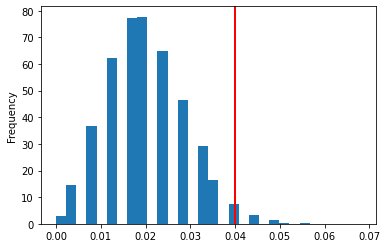

In [336]:
N = 100_000
result  = np.random.choice([0,1],size = (N,250),p=[.02,.98]).sum(axis = 1) / 250
result = 1 - result
result


pd.Series(result).plot(kind = 'hist', density = True, bins = 30)
plt.axvline(x=.04, color='red', linewidth=2);
(result >= .04).sum() / N

In [338]:
grader.check("q8")

q8 results: All test cases passed!

## Part 5: Superheroes 🦸

The questions below analyze a dataset of superheroes found in the `data` directory. One of the datasets lists the attributes of each superhero, while the other is a *Boolean* DataFrame describing which superheroes have which superpowers. Note, the datasets contain information on both **good** superheroes, as well as **bad** superheroes (AKA villains). 

### Question 9

Let's start working with the `powers` dataset, which you can see in `data/superheroes_powers.csv`. Write a function called `super_hero_powers` that takes in a DataFrame like `powers` and returns a list with the following three entries:

1. The name of the superhero with the greatest number of superpowers.
2. The name of the most common superpower among superheroes whose names begin with `'M'`.
3. The name of the most common superpower among superheroes with only one superpower.

You should **not** be hard-coding your answers in this question; your function should work on any DataFrame similar to `powers`. You should not be using loops in this question. In each case, you can assume the answer is unique.

***Hint:*** You may find the `idxmax` method useful in this problem.

In [418]:
super_fp = os.path.join('data', 'superheroes_powers.csv')
powers = pd.read_csv(super_fp).set_index('hero_names')
greatest_num = powers.sum(axis=1).idxmax()
greatest_num

M_common = powers.reset_index()
M_common = M_common[M_common['hero_names'].str.startswith('M')].set_index('hero_names')
M_common = M_common.sum(axis = 0).idxmax()
M_common

one_super = powers
one_super = one_super.sum(axis = 1)
one_super = powers[one_super == 1]
one_super

one_super = one_super.sum(axis = 0).idxmax()
one_super
[greatest_num,M_common,one_super]

['Spectre', 'Super Strength', 'Intelligence']

In [421]:
# don't change this cell -- it is needed for the tests to work
super_fp = os.path.join('data', 'superheroes_powers.csv')
powers = pd.read_csv(super_fp)

super_out = super_hero_powers(powers)
super_out

['Spectre', 'Super Strength', 'Intelligence']

In [420]:
grader.check("q9")

q9 results: All test cases passed!

### Question 10

In the notebook, load in the dataset in `data/superheroes.csv` as a DataFrame and explore it. Call your `population_stats` function from Question 6 on the DataFrame. You should notice that there are very few actually null (`np.NaN`) values, but there are many entries that **should** be null.

Write a function called `clean_heroes` that takes in a DataFrame like the one mentioned above and returns a new DataFrame with all of the missing values replaced with `np.NaN`.

***Note:*** Most of the work in this question is identifying how the missing values are stored in the DataFrame. The implementation of the function should only take one line.

In [495]:
heroes = os.path.join('data', 'superheroes.csv')
heroes = pd.read_csv(heroes)
heroes.dtypes

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [496]:
population_stats(heroes)

,num_nonnull,prop_nonnull,num_distinct,prop_distinct
Unnamed: 0,734,1.0,734,1.000000
name,734,1.0,715,0.974114
Gender,734,1.0,3,0.004087
Eye color,734,1.0,23,0.031335
Race,734,1.0,62,0.084469
Hair color,734,1.0,30,0.040872
Height,734,1.0,54,0.073569
Publisher,734,1.0,24,0.032698
Skin color,734,1.0,17,0.023161
Alignment,734,1.0,4,0.005450


In [479]:
'-' == -99.0

False

In [482]:
def clean_entries(enter):
    if  enter  == '-' or enter == -99.0:
        return np.nan
    else: 
        return enter

In [497]:
heroes = heroes.applymap(clean_entries)
heroes.to_csv('test.csv')
heroes2 = pd.read_csv('test.csv')
heroes2

,Unnamed: 0,Unnamed: 0.1,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,4,4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
729,729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,NaN,good,52.0
730,730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,NaN
731,731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,NaN,good,57.0


In [539]:
# don't change this cell -- it is needed for the tests to work
superheroes_fp = os.path.join('data', 'superheroes.csv')
heroes = pd.read_csv(superheroes_fp, index_col=0)
clean_out = clean_heroes(heroes)
clean_out

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,NaN,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,NaN
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,NaN,good,57.0


In [493]:
grader.check("q10")

q10 results: All test cases passed!

Below, we have displayed the first 10 rows of the cleaned DataFrame.

In [500]:
clean_out.head(10)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,NaN,bad,122.0
6,Adam Monroe,Male,blue,NaN,Blond,NaN,NBC - Heroes,NaN,good,NaN
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,NaN,good,88.0
8,Agent 13,Female,blue,NaN,Blond,173.0,Marvel Comics,NaN,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,NaN,good,81.0


### Question 11

Using the **cleaned** superhero data, we will now generate some insights. We are curious about the following questions. The `super_hero_stats` function should return a list of length 6 that contains your answers to the questions below. **Your answers should be hard-coded in the function.**

0. Which publisher has a greater proportion of "bad" characters – `'Marvel Comics'` or `'DC Comics'`?
1. How many characters are NOT of race `'Human'`, or have a publisher that is neither `'Marvel Comics'` nor `'DC Comics'`? (Only consider the race `'Human'`, not races such as `'Human / Radiation'`.)

2. There is only one character that is **both** greater than one standard deviation above the mean in height and at least one standard deviation below the mean in weight. What is their name?
3. Who is heavier on average – `'good'` characters or `'bad'` characters?
4. What is the name of the tallest `'Mutant'` with `'No Hair'`?
5. What is the probability that a randomly chosen `'Marvel Comics'` character in the dataset is `'Female'`?

***Note:*** Although you'll be writing code to find the answers, you should not include your code in your `.py` file. Just return a hard-coded list with your answers to the 6 questions.

In [579]:
marvel = clean_out[clean_out['Publisher'] == 'Marvel Comics']

marvel['Gender'].value_counts()[1] /marvel.shape[0]

0.2860824742268041

In [567]:
clean_out[(clean_out['Race'] == 'Mutant') & (clean_out['Hair color'] == 'No Hair')].sort_values(by = 'Height', ascending = False)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
504,Onslaught,Male,red,Mutant,No Hair,305.0,Marvel Comics,NaN,bad,405.0
91,Bishop,Male,brown,Mutant,No Hair,198.0,Marvel Comics,NaN,good,124.0
648,Swarm,Male,yellow,Mutant,No Hair,196.0,Marvel Comics,yellow,bad,47.0
212,Deadpool,Male,brown,Mutant,No Hair,188.0,Marvel Comics,NaN,neutral,95.0
528,Professor X,Male,blue,Mutant,No Hair,183.0,Marvel Comics,NaN,good,86.0
342,Ink,Male,blue,Mutant,No Hair,180.0,Marvel Comics,NaN,good,81.0
120,Bloodhawk,Male,black,Mutant,No Hair,NaN,Marvel Comics,NaN,good,NaN
227,Donatello,Male,green,Mutant,No Hair,NaN,IDW Publishing,green,good,NaN
404,Leonardo,Male,blue,Mutant,No Hair,NaN,IDW Publishing,green,good,NaN
543,Raphael,Male,NaN,Mutant,No Hair,NaN,IDW Publishing,green,good,NaN


In [562]:
clean_out['Weight'].describe()

count    495.000000
mean     112.252525
std      104.151142
min        2.000000
25%       61.000000
50%       81.000000
75%      108.000000
max      900.000000
Name: Weight, dtype: float64

In [556]:
non_human = clean_out[(clean_out['Race'] != 'Human')]
no_studio = non_human[non_human['Publisher'] != 'Marvel Comics']
no_studio = no_studio[no_studio['Publisher'] != 'DC Comics']
                      #| (non_human['Publisher'] != 'DC Comics')]
no_studio#.dtypes

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
6,Adam Monroe,Male,blue,NaN,Blond,NaN,NBC - Heroes,NaN,good,NaN
15,Alex Woolsly,Male,NaN,NaN,NaN,NaN,NBC - Heroes,NaN,good,NaN
17,Alien,Male,NaN,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
18,Allan Quatermain,Male,NaN,NaN,NaN,NaN,Wildstorm,NaN,good,NaN
...,...,...,...,...,...,...,...,...,...,...
675,Tracy Strauss,Female,NaN,NaN,NaN,NaN,NBC - Heroes,NaN,good,NaN
685,Valerie Hart,Female,hazel,NaN,Black,175.0,Team Epic TV,NaN,good,56.0
688,Vegeta,Male,NaN,Saiyan,Black,168.0,Shueisha,NaN,bad,73.0
697,Violator,Male,NaN,NaN,NaN,NaN,Image Comics,NaN,bad,NaN


In [533]:
marvel = clean_out[clean_out['Publisher'] == 'Marvel Comics']
counts = marvel[['Alignment']].value_counts()
counts
counts[1] / marvel.shape[0]

0.2963917525773196

In [531]:
dc = clean_out[clean_out['Publisher'] == 'DC Comics']
counts2 = dc[['Alignment']].value_counts()
counts2

counts2[1] / dc.shape[0]
dc.shape[0]
counts2

214

In [583]:
# don't change this cell -- it is needed for the tests to work
stats_out = super_hero_stats()

In [584]:
grader.check("q11")

q11 results: All test cases passed!

### Question 12 

Create a function called `bhbe_col` that takes in a DataFrame like `heroes` and returns a Boolean Series that contains `True` for characters that have **both** blond hair and blue eyes, and `False` for all other characters. 

***Note***: If a character's hair color contains the word `'blond'`, uppercase or lowercase, we consider their hair to be blond for the purposes of this question. Similarly, if a character's eye color contains the word `'blue'`, uppercase or lowercase, we consider their eye color to be blue for the purposes of this question.

In [595]:
cool = (clean_out['Hair color'].str.lower() == 'blond') & (clean_out['Eye color'].str.lower() == 'blue')
cool.sum()

87

In [598]:
# don't change this cell -- it is needed for the tests to work
superheroes_fp = os.path.join('data', 'superheroes.csv')
heroes = pd.read_csv(superheroes_fp, index_col=0)
bhbe_out = bhbe_col(heroes)

In [599]:
grader.check("q12")

q12 results: All test cases passed!

### Question 13

Now, you'd like to answer the question 
> Are blond-haired, blue-eyed characters disproportionately "good"?

To do this, you'd like to test the null hypothesis:
> The proportion of "good" characters among blond-haired, blue-eyed characters is equal to the proportion of "good" characters in the overall population."

Fix a significance level of 1%.

Before proceeding, think about what test statistic to use in this hypothesis test. Once you've done that, complete the implementations of the following functions.

#### `observed_stat`
`observed_stat` takes in the DataFrame `heroes` and returns the observed test statistic.

#### `simulate_bhbe_null` 
`simulate_bhbe_null` takes in a positive integer `n` and returns an array of length `n`, where each element is a simulated test statistic according to the null hypothesis. You should hard-code the simulation parameter within your function, do not read in any data. (The simulation parameter is a probability. You can round it to two decimal places.)

***Hint:*** You can access columns of a multidimensional array the same way you access columns of a DataFrame using `iloc`.

#### `calc_pval` 
`calc_pval` takes in no parameters and returns a list where:
* The first element is the p-value for the hypothesis test (using 100,000 simulations). Please run the code yourself **in your notebook** and hard-code this answer **in your `.py` file**, as actually running the 100,000 simulation hypothesis test will timeout on Gradescope.
* The second element is `'Reject'` if you reject the null hypothesis and `'Fail to reject'` if you fail to reject the null hypothesis, at the 1% significance level.

In [653]:
n = 100_000

sims = np.random.choice([0,1,2], size = (n,734), p=(.6790,.2852,.0358))


In [654]:
sims[0]

array([1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,

0.8494623655913979


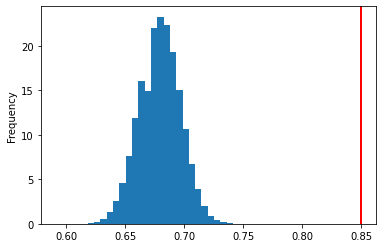

In [655]:
results = (sims[0:] == 0).sum(axis = 1) / 734
pd.Series(results).plot(kind = 'hist', density=True, bins=30)
x = observed_stat(heroes)
print(x)
plt.axvline(x=x, color='red', linewidth=2);

In [658]:
(results >= x).mean()

0.0

In [657]:
sims[sims[0:sims.shape[0]][0:] == 0].shape

(49841475,)

In [ ]:
0.6757493188010899
0.28201634877384196
0.0326975476839237


In [613]:
test_stat = clean_out['Alignment'].value_counts()
test_stat[2] / clean_out.shape[0]
#clean_out.shape[0]

0.0326975476839237

In [606]:
all_bhbe = clean_out[bhbe_col(heroes)]
observed = all_bhbe['Alignment'].value_counts()
observed[0] / all_bhbe.shape[0]
#all_bhbe.shape[0]

0.8494623655913979

In [660]:
# don't change this cell -- it is needed for the tests to work
obs_stat_out = observed_stat(heroes)

simulate_bhbe_out = simulate_bhbe_null(10)

pval_out = calc_pval()

In [661]:
grader.check("q13")

q13 results: All test cases passed!

## Congratulations! You're done! 🏁

Submit your `.py` file to Gradescope. Note that you only need to submit the `.py` file; this notebook should not be uploaded.

Before submitting, you should ensure that all of your work is in the `.py` file. You can do this by running the doctests below, which will verify that your work passes the public tests **and** that your work is in the `.py` file. Run the cell below; you should see no output.

In [662]:
!python -m doctest lab.py

**********************************************************************
File "/home/v/Documents/github_repos/dsc80-2022-sp/labs/02-pandas/lab.py", line 332, in lab.null_hyp
Failed example:
    isinstance(null_hypoth(), list)
Exception raised:
    Traceback (most recent call last):
      File "/home/v/Documents/anaconda3/envs/dsc80/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest lab.null_hyp[0]>", line 1, in <module>
        isinstance(null_hypoth(), list)
    NameError: name 'null_hypoth' is not defined
**********************************************************************
1 items had failures:
   1 of   2 in lab.null_hyp
***Test Failed*** 1 failures.


In addition, `grader.check_all()` will verify that your work passes the public tests. Ultimately, the Gradescope autograder is also going to run `grader.check_all()`, so you should ensure these pass as well (which they should if the doctests above passed).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [663]:
grader.check_all()

q1 results: All test cases passed!

q10 results: All test cases passed!

q11 results: All test cases passed!

q12 results: All test cases passed!

q13 results: All test cases passed!

q2 results:
    q2 - 1 result:
        Trying:
            isinstance(avscore, float)
        Expecting:
            True
        **********************************************************************
        Line 1, in q2 0
        Failed example:
            isinstance(avscore, float)
        Exception raised:
            Traceback (most recent call last):
              File "/home/v/Documents/anaconda3/envs/dsc80/lib/python3.8/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2 0[0]>", line 1, in <module>
                isinstance(avscore, float)
            NameError: name 'avscore' is not defined

    q2 - 2 result:
        Trying:
            91 < avscore < 92
        Expecting:
            True
        ******************